In [20]:
using Turing
using LimberJack
using CSV
using NPZ
using Plots
using FITSIO

In [8]:
datas = [Data("DESgc", "DESgc", 2 , 2),
         Data("DESgc", "DESwl", 2 , 3)];
Nzs = [Nz(1), Nz(2), Nz(3), Nz(4)]
Cls_metas = Cls_meta(datas);
cov_tot = Cls_metas.cov_tot;
data_vector = Cls_metas.data_vector;

In [34]:
nzs_fname = string("y1_redshift_distributions_v1.fits")
bin_name = "BIN$bin_number"
FITS(joinpath("data", nzs_fname))

File: data/y1_redshift_distributions_v1.fits
Mode: "r" (read-only)
HDUs: Num  Name            Type   
      1                    Image  
      2    nz_source_mcal  Table  
      3    nz_source_im3   Table  
      4    nz_lens         Table  
      5    nz_lens_dss     Table  

In [35]:
struct Nz_test
    nz
    zs
end

function Nz_test(bin_number; path="data")
    nzs_fname = string("y1_redshift_distributions_v1.fits")
    bin_name = "BIN$bin_number"
    nzs = FITS(joinpath(path, nzs_fname))
    nz = read(nzs["nz_source_im3"], bin_name)
    zs = read(nzs["nz_lens"], "Z_MID")
    Nz_test(nz, zs)
end

Nz_test

In [37]:
Nzs_test = [Nz_test(1), Nz_test(2), Nz_test(3), Nz_test(4)]

4-element Vector{Nz_test}:
 Nz_test([0.006313984530075498, 0.02304419161554814, 0.043715987283114224, 0.07069903518773167, 0.10062908375463857, 0.13408295322787597, 0.1696700961917059, 0.20887640614232436, 0.2458028843837666, 0.28865601460833246  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0051, 0.015099999999999999, 0.0251, 0.035100000000000006, 0.0451, 0.0551, 0.0651, 0.07510000000000001, 0.0851, 0.0951  …  3.9051000000000005, 3.9151000000000002, 3.9251, 3.9351000000000003, 3.9451000000000005, 3.9551000000000003, 3.9651, 3.9751000000000003, 3.9851000000000005, 3.9951000000000003])
 Nz_test([0.0034303462026333384, 0.011194623602128901, 0.020357846919049724, 0.02936292238776333, 0.03941838652322934, 0.054863776880914206, 0.06711545904464393, 0.08552038802375914, 0.10005376244465093, 0.11739932369596544  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0051, 0.015099999999999999, 0.0251, 0.035100000000000006, 0.0451, 0.0551, 0.0651, 0.07510000000000001, 0.0851, 0.09

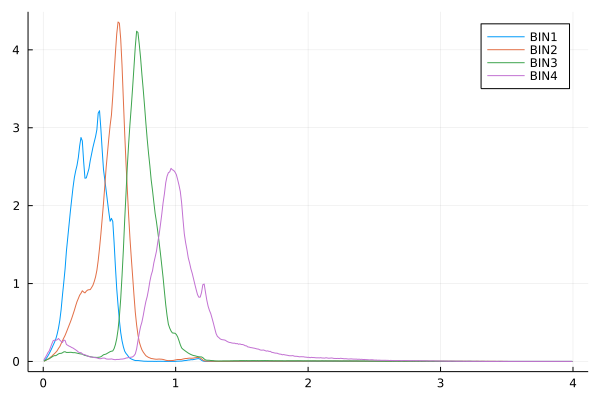

In [39]:
plot(Nzs_test[1].zs, Nzs_test[1].nz, label="BIN1")
plot!(Nzs_test[2].zs, Nzs_test[2].nz, label="BIN2")
plot!(Nzs_test[3].zs, Nzs_test[3].nz, label="BIN3")
plot!(Nzs_test[4].zs, Nzs_test[4].nz, label="BIN4")
plot!(Nzs_test[5].zs, Nzs_test[5].nz, label="BIN5")


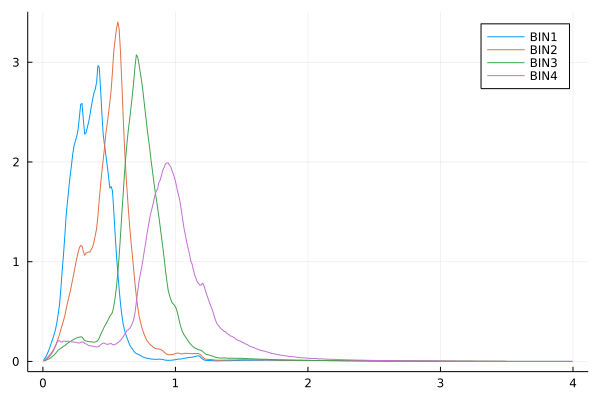

In [24]:
plot(Nzs[1].zs, Nzs[1].nz, label="BIN1")
plot!(Nzs[2].zs, Nzs[2].nz, label="BIN2")
plot!(Nzs[3].zs, Nzs[3].nz, label="BIN3")
plot!(Nzs[4].zs, Nzs[4].nz, label="BIN4")


In [ ]:
plot(Nzs[1].zs, Nzs[1].nzs, )

In [4]:
cosmology_test = LimberJack.Cosmology(0.3, 0.05, 0.67, 0.96, 0.81,
                                     tk_mode="EisHu",
                                     Pk_mode="Halofit")

Cosmology(CosmoPar{Real}(0.3, 0.05, 0.67, 0.96, 0.81, 1.0092592592592593, 9.312755027430078e-5, 0.6999068724497256), [0.00010000000000000009, 0.00010556729942333301, 0.00011144454707535637, 0.00011764899870201866, 0.0001241988707283131, 0.00013111339374215648, 0.00013841286895587576, 0.00014611872781107477, 0.00015425359490188242, 0.0001628413544013252  …  61.40946221409371, 64.82831084981079, 68.43749702590878, 72.24761740317568, 76.26985859023445, 80.51602998770541, 84.99859846090156, 89.7307249428564, 94.72630307515249, 100.00000000000004], [2406.237882850354, 2534.573724610856, 2669.7393327076898, 2812.0956417826924, 2962.022237564655, 3119.918250632867, 3286.2032814672125, 3461.318355899214, 3645.726909654808, 3839.915800182919  …  0.0017811081989842837, 0.0015344413789781795, 0.0013217757140307164, 0.001138448788397389, 0.0009804337997963348, 0.0008442534762913425, 0.0007269055648214446, 0.0006257983493148575, 0.000538694859344118, 0.00046366460782812006], 0.054178472776330366, [

In [5]:
theory_test = Theory(cosmology_test, Cls_metas, Nzs)

Theory(Any[NumberCountsTracer(400-element extrapolate(interpolate((::Vector{Float64},), ::Vector{Float64}, Gridded(Linear())), 0) with element type Float64:
 7.54849147931214e-7
 2.5941589813645726e-6
 4.5984890921492065e-6
 7.108028903950896e-6
 9.526112483298392e-6
 1.3487498937675878e-5
 1.7348808581820102e-5
 2.282368040106995e-5
 2.89045658355712e-5
 3.5961076318589954e-5
 4.474518675177204e-5
 5.493205579411745e-5
 6.383362063242772e-5
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0, 2.0, 0), WeakLensingTracer(400-element extrapolate(interpolate((::Vector{Float64},), ::Vector{Float64}, Gridded(Linear())), 0) with element type Float64:
 1.0030180987739053e-9
 9.964245467830256e-7
 1.9695145236263417e-6
 2.9185930083732217e-6
 3.844932632537704e-6
 4.746717589110546e-6
 5.6233330415880364e-6
 6.474870300480444e-6
 7.3007414838205344e-6
 8.09975545325876e-6
 8.874756345468103e-6
 9.620729099242038e-6
 1.0339784236248797e-5
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0

In [7]:
@model function model(data_vector)
    Ωm ~ Uniform(0.2, 0.3)
    h ~ Uniform(0.6, 0.8)
    s8 ~ Uniform(0.7, 1.0)
    cosmology = LimberJack.Cosmology(Ωm, 0.05, h, 0.96, s8,
                                     tk_mode="EisHu",
                                     Pk_mode="Halofit")
    theory = Theory(cosmology, Cls_metas, Nzs).Cls
    data_vector ~ MvNormal(theory, cov_tot)
end;

iterations = 50
step_size = 0.005
samples_per_step = 10
cores = 4

# Start sampling.
folname = string("DES_gc2gc2_gc2wl3_", "stpsz_", step_size, "_smpls_", samples_per_step)
if isdir(folname)
    println("Folder already exists")
    if isfile(joinpath(folname, "chain.jls"))
        println("Restarting from past chain")
        past_chain = read(joinpath(folname, "chain.jls"), Chains)
        new_chain = sample(model(data_vector), HMC(step_size, samples_per_step), iterations,
                           progress=true; save_state=true, resume_from=past_chain)
    end
else
    mkdir(folname)
    println("Created new folder")
    new_chain = sample(model(data_vector), HMC(step_size, samples_per_step),
                iterations, progress=true; save_state=true)
end

info = describe(new_chain)[1]
fname_info = string("info.csv")
CSV.write(joinpath(folname, fname_info), info)


fname_jls = string("chain.jls")
write(joinpath(folname, fname_jls), new_chain)
    
fname_csv = string("chain.csv")
CSV.write(joinpath(folname, fname_csv), new_chain)



Sampling: 100%|█████████████████████████████████████████| Time: 0:05:34


Created new folder


"DES_gc2gc2_gc2wl3_stpsz_0.005_smpls_10/chain.csv"

In [ ]:
@model function model(data_vector)
    Ωm ~ Uniform(0.2, 0.3)
    h ~ Uniform(0.6, 0.8)
    s8 ~ Uniform(0.7, 1.0)
    cosmology = LimberJack.Cosmology(Ωm, 0.05, h, 0.96, s8,
                                     tk_mode="EisHu",
                                     Pk_mode="Halofit")
    theory = Theory(cosmology, Cls_metas, Nzs).Cls
    data_vector ~ MvNormal(theory, cov_tot)
end;

iterations = 500

# Start sampling.
folname = string("DES_gs_MH")
if isdir(folname)
    println("Folder already exists")
    if isfile(joinpath(folname, "chain.jls"))
        println("Restarting from past chain")
        past_chain = read(joinpath(folname, "chain.jls"), Chains)
        new_chain = sample(model(data_vector), MH(), iterations,
                           progress=true; save_state=true, resume_from=past_chain)
    end
else
    mkdir(folname)
    println("Created new folder")
    new_chain = sample(model(data_vector), MH(), iterations,
                       progress=true; save_state=true)
end

info = describe(new_chain)[1]
fname_info = string("info.csv")
CSV.write(joinpath(folname, fname_info), info)


fname_jls = string("chain.jls")
write(joinpath(folname, fname_jls), new_chain)
    
fname_csv = string("chain.csv")
CSV.write(joinpath(folname, fname_csv), new_chain)



Sampling:  10%|████▏                                    |  ETA: 0:04:30